<h1 align="center">Project Introduction: Health Insurance Lead Prediction</h1>

## Context
**FinMan**, a financial services company, aims to cross-sell health insurance to existing customers, enhancing their service offering. These customers may either already hold various policies with FinMan or may be new to insurance products. The primary goal is to predict whether customers will show interest in recommended health insurance plans upon visiting the company's website.

## About the Dataset
The dataset comprises demographic and policy-related information of customers, which includes:
- **City**: Code for the city of the customers
- **Age**: Maximum and minimum age of the customer (captured as `Upper_Age` and `Lower_Age`)
- **Current Insurance Holdings**: Information regarding any existing insurance policies the customer holds
- **Recommended Health Insurance Plans**: Details about the health insurance plans recommended to them

When a customer fills out a form expressing interest in a recommended policy, they are considered a lead. The task is to predict the **'Response'**—whether a customer will be interested in the proposed health insurance plan.


<p align="center">
  <img src="datasc-660x434.png" alt="Data Science Image">
</p>

# 1. Data preparation


## 1.1 Read and Explore

First, let us take a look at the raw data.

In [185]:
import pandas as pd
import numpy as np

# read in all our data
df = pd.read_csv(r"C:/Users/46281/Desktop/学习/课程/MBA 573/Health Insurance Lead Prediction Raw Data.csv")

# set seed for reproducibility
np.random.seed(0) 

df.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0


In [186]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 50882 rows and 14 columns


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [188]:
df.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


## 1.2 check missing values

I can see some "NaN" values in the df, now I want to count how many missing values are there.

In [189]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()

# look at the # of missing points
missing_values_count[0:15]

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

The results shown lots of missing values in "Health Indicator", "Holding_Policy_Duration", and "Holding_Policy_Type". 


In [190]:
df["Holding_Policy_Duration"].unique()

array(['14+', nan, '1', '3', '5', '9', '14', '7', '2', '11', '10', '8',
       '6', '4', '13', '12'], dtype=object)

In [191]:
df["Holding_Policy_Type"].unique()

array([ 3., nan,  1.,  4.,  2.])

In [192]:
df["Health Indicator"].unique()

array(['X1', 'X2', nan, 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

It might be helpful to find out the percentage of the missing values to give a better sense of the scale.

In [193]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

7.326896404566307

Since the size of the dataset is large enough. The percentage seem not too high. But I still want to take a closer look into it and figure out what to do with it.

## 1.3 Find out the reason why

The question is, are those data missing because they don't exist or because they were not recorded?

According to the description, Health_Indicator is Encoded values for health of the customer; Holding_Policy_Duration is Duration (in years) of holding policy (a policy that customer has already subscribed to with the company); Holding_Policy_Type is Type of holding policy.

With this information, I assume the missing in "Health_Indicator" is due to not recorded.

The observation that missing values in two columns frequently coincide on the same rows suggests a systematic pattern in the data absence, rather than random missingness. 

## 1.4 Filling in missing values automatically

Missing values in 'Holding_Policy_Duration' and 'Holding_Policy_Type' will be filled with zeros, assuming these represent cases with no existing policies, such as for new customers.

In [194]:
# Fill missing values in 'Holding_Policy_Duration' and 'Holding_Policy_Type' with 0
df['Holding_Policy_Duration'].fillna(0, inplace=True)
df['Holding_Policy_Type'].fillna(0, inplace=True)
df['Health Indicator'].fillna("X0", inplace=True)
df.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,0,0.0,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,X0,1,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,X0,0,0.0,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,X0,7,4.0,18,21100.8,1


For the missing in "Health Indicator", I will replace the nulls into X0.

In [195]:
df["Health Indicator"] = df["Health Indicator"].fillna("X0")

In [196]:
df["Health Indicator"].unique()

array(['X1', 'X2', 'X0', 'X4', 'X3', 'X6', 'X5', 'X8', 'X7', 'X9'],
      dtype=object)

In [197]:
df["Holding_Policy_Duration"].unique()

array(['14+', 0, '1', '3', '5', '9', '14', '7', '2', '11', '10', '8', '6',
       '4', '13', '12'], dtype=object)

In [198]:
df["Holding_Policy_Type"].unique()

array([3., 0., 1., 4., 2.])

Now check if they were replaced correctly.

## 1.5 check duplicates

In [199]:
df.duplicated().sum()

0

# 2 Preprocess

## 2.1 Considerations for Feature Relevance
Relevant Features
- City_Code: Might influence insurance needs due to regional health trends or availability of healthcare services.

- Region_Code: Similar to City_Code, it could reflect local differences in healthcare needs or insurance preferences.
 
- Accommodation_Type: Owning vs. renting could correlate with stability or financial status, impacting insurance decisions.

- Reco_Insurance_Type: Whether the insurance is individual or joint could influence a customer's decision based on their familial and health responsibilities.
  
- Upper_Age & Lower_Age: Age is a significant factor in health insurance as it directly relates to health risks and insurance needs.
  
- Is_Spouse: Indicates if the policy is for a family setting, which can affect the preference for certain types of insurance policies.
  
- Health Indicator: Provides a direct indication of the customer's health status, likely influencing their interest in specific health insurance products.
  
- Reco_Policy_Cat: The category of recommended policy might align with the customer’s needs or preferences, affecting their response.
  
- Reco_Policy_Premium: The cost of the policy could be a decisive factor for the customer’s interest in the insurance.
  
Potentially Irrelevant Features

- ID: Merely an identifier with no predictive power regarding the customer's behavior or preferences.
  
- Holding_Policy_Duration: While it shows how long a customer has been with a policy, it might not directly influence their interest in new policy offers unless it reflects on customer loyalty or satisfaction.
  
- Holding_Policy_Type: The type of existing policy might provide some context about customer preferences but is less directly linked to their interest in new offers unless specific policy types are known to correlate with additional purchases.
  
Summary of Considerations

- Directly relevant: Features that provide explicit information about the customer's health status, demographic, financial stability, and preferences regarding insurance type.
- Indirectly relevant: Features that might give background context or insights into the customer's long-term financial behavior or previous decisions in insurance but don’t directly indicate their likelihood to respond to new offers.
- Irrelevant: Features that do not contribute to understanding customer preferences or predicting customer behavior towards new insurance policies.

## 2.2 Dropping Irrelevant Columns
We'll drop the columns ID, Holding_Policy_Duration, Holding_Policy_Type, Reco_Policy_Cat, and Reco_Policy_Premium from the dataset as they are either identifiers or more related to insurance policy specifics rather than direct indicators of health.

In [200]:
df.drop(['ID', 'Holding_Policy_Duration', 'Holding_Policy_Type', ], axis=1, inplace=True)

In [201]:
df.head

<bound method NDFrame.head of       City_Code  Region_Code Accomodation_Type Reco_Insurance_Type  Upper_Age  \
0            C3         3213            Rented          Individual         36   
1            C5         1117             Owned               Joint         75   
2            C5         3732             Owned          Individual         32   
3           C24         4378             Owned               Joint         52   
4            C8         2190            Rented          Individual         44   
...         ...          ...               ...                 ...        ...   
50877        C4          845            Rented          Individual         22   
50878        C5         4188            Rented          Individual         27   
50879        C1          442            Rented          Individual         63   
50880        C1            4             Owned               Joint         71   
50881        C3         3866            Rented          Individual         24  

## 2.3 Encoding Categorical Variables
Now, we need to encode the categorical variables that are likely to influence the "Health Indicator". These include City_Code, Region_Code, Accommodation_Type, Reco_Insurance_Type, and Is_Spouse.

1. Label Encoding for City_Code and Region_Code
These are nominal categories but typically represent many unique values, making one-hot encoding impractical. Label encoding converts each unique label into a numeric code.

In [202]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['City_Code'] = label_encoder.fit_transform(df['City_Code'])
df['Region_Code'] = label_encoder.fit_transform(df['Region_Code'])
df.head(10)

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,22,2761,Rented,Individual,36,36,No,X1,22,11628.0,0
1,31,932,Owned,Joint,75,22,No,X2,22,30510.0,0
2,31,3241,Owned,Individual,32,32,No,X0,19,7450.0,1
3,16,3842,Owned,Joint,52,48,No,X1,19,17780.0,0
4,34,1866,Rented,Individual,44,44,No,X2,16,10404.0,0
5,35,1512,Rented,Individual,52,52,No,X2,22,15264.0,1
6,22,551,Owned,Individual,28,28,No,X0,17,10640.0,0
7,0,2727,Owned,Joint,75,73,Yes,X4,17,29344.0,1
8,6,3019,Owned,Joint,52,43,No,X1,1,27283.2,0
9,0,430,Owned,Joint,59,26,Yes,X0,18,21100.8,1


2. One-Hot Encoding for Accommodation_Type, Reco_Insurance_Type, and Is_Spouse
These are nominal categories with fewer unique values, making them suitable for one-hot encoding. This method converts categories into separate binary columns, each representing one category.

In [203]:
print(df.columns)
# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse'])

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Health Indicator',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')


In [204]:
df = pd.get_dummies(df, columns=['Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse','Health Indicator'], drop_first=True)
df.head(10)

,City_Code,Region_Code,Upper_Age,Lower_Age,Reco_Policy_Cat,Reco_Policy_Premium,Response,Accomodation_Type_Rented,Reco_Insurance_Type_Joint,Is_Spouse_Yes,Health Indicator_X1,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,22,2761,36,36,22,11628.0,0,1,0,0,1,0,0,0,0,0,0,0,0
1,31,932,75,22,22,30510.0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,31,3241,32,32,19,7450.0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,16,3842,52,48,19,17780.0,0,0,1,0,1,0,0,0,0,0,0,0,0
4,34,1866,44,44,16,10404.0,0,1,0,0,0,1,0,0,0,0,0,0,0
5,35,1512,52,52,22,15264.0,1,1,0,0,0,1,0,0,0,0,0,0,0
6,22,551,28,28,17,10640.0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,2727,75,73,17,29344.0,1,0,1,1,0,0,0,1,0,0,0,0,0
8,6,3019,52,43,1,27283.2,0,0,1,0,1,0,0,0,0,0,0,0,0
9,0,430,59,26,18,21100.8,1,0,1,1,0,0,0,0,0,0,0,0,0


# 3. EDA

In [205]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 3.1 How many people responsed?

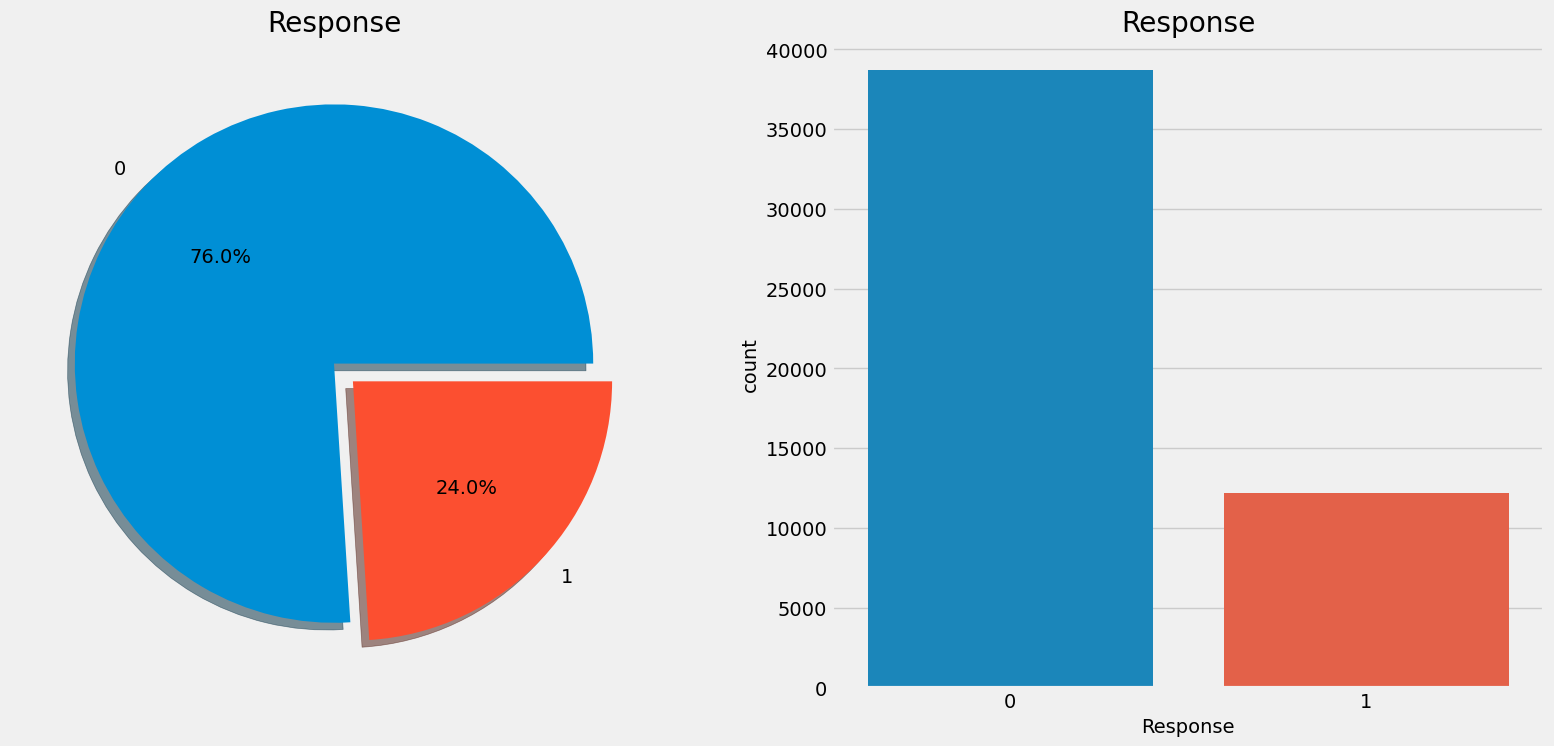

In [206]:
# Plotting the EDA visualizations
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for Response
df['Response'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Response')
ax[0].set_ylabel('')

# Count plot for Response
sns.countplot(x='Response', data=df, ax=ax[1])
ax[1].set_title('Response')

plt.show()

It is obvious that most of people (76%) did not respond to the advertisement.

## 3.2 How many of those responded are spouses?

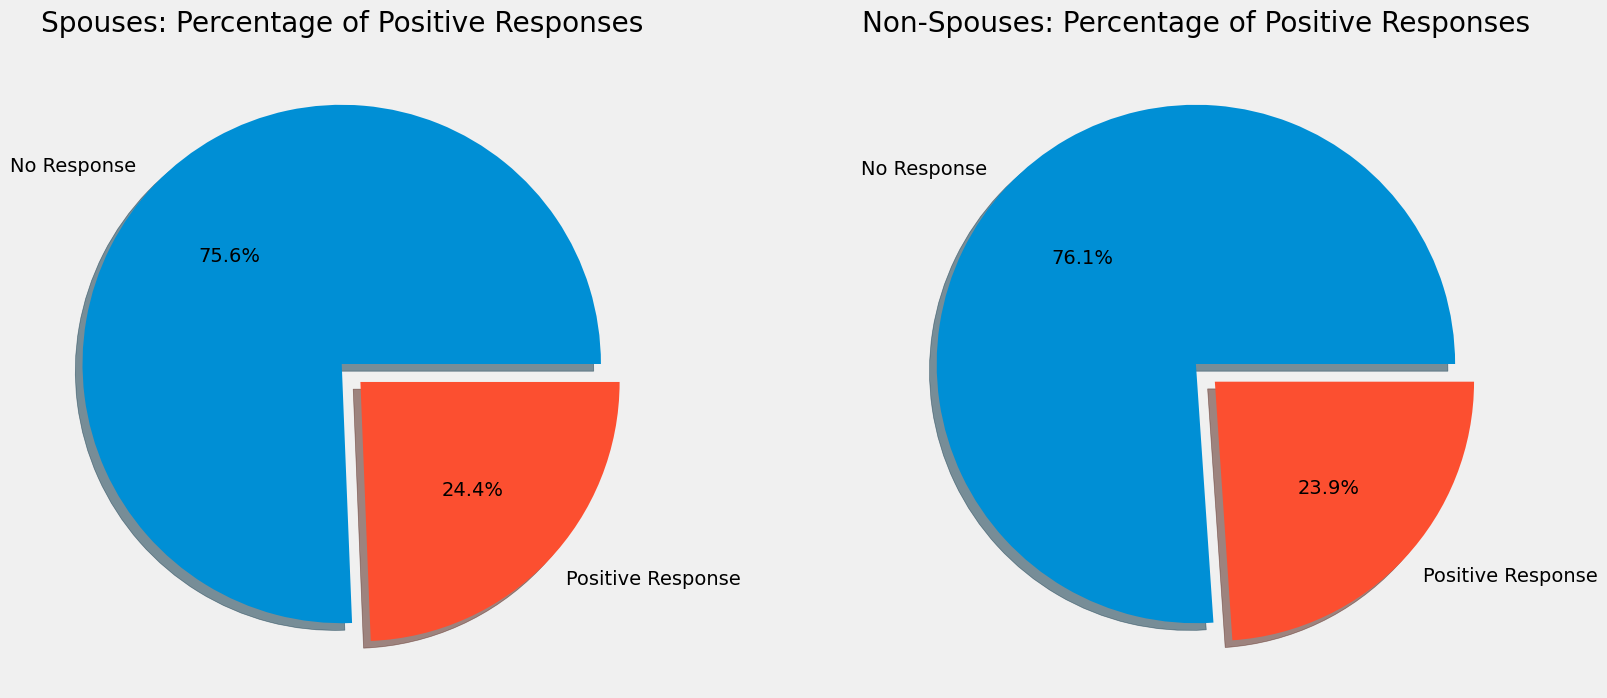

In [207]:
# Calculate the percentage of positive responses for spouses and non-spouses
spouse_response = df[df['Is_Spouse_Yes'] == 1]['Response'].value_counts(normalize=True)
non_spouse_response = df[df['Is_Spouse_Yes'] == 0]['Response'].value_counts(normalize=True)

# Ensure both categories (0 and 1) are present in the value_counts
if 1 not in spouse_response:
    spouse_response[1] = 0
if 1 not in non_spouse_response:
    non_spouse_response[1] = 0

# Plotting the visualizations
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for spouses
spouse_response.plot.pie(
    labels=['No Response', 'Positive Response'],
    autopct='%1.1f%%',
    explode=[0, 0.1],
    shadow=True,
    ax=ax[0]
)
ax[0].set_title('Spouses: Percentage of Positive Responses')
ax[0].set_ylabel('')

# Pie chart for non-spouses
non_spouse_response.plot.pie(
    labels=['No Response', 'Positive Response'],
    autopct='%1.1f%%',
    explode=[0, 0.1],
    shadow=True,
    ax=ax[1]
)
ax[1].set_title('Non-Spouses: Percentage of Positive Responses')
ax[1].set_ylabel('')

plt.show()

It's clear that is spouse or not doesn't effect the response.

## 3.3 What is the age distribution in the researched group?

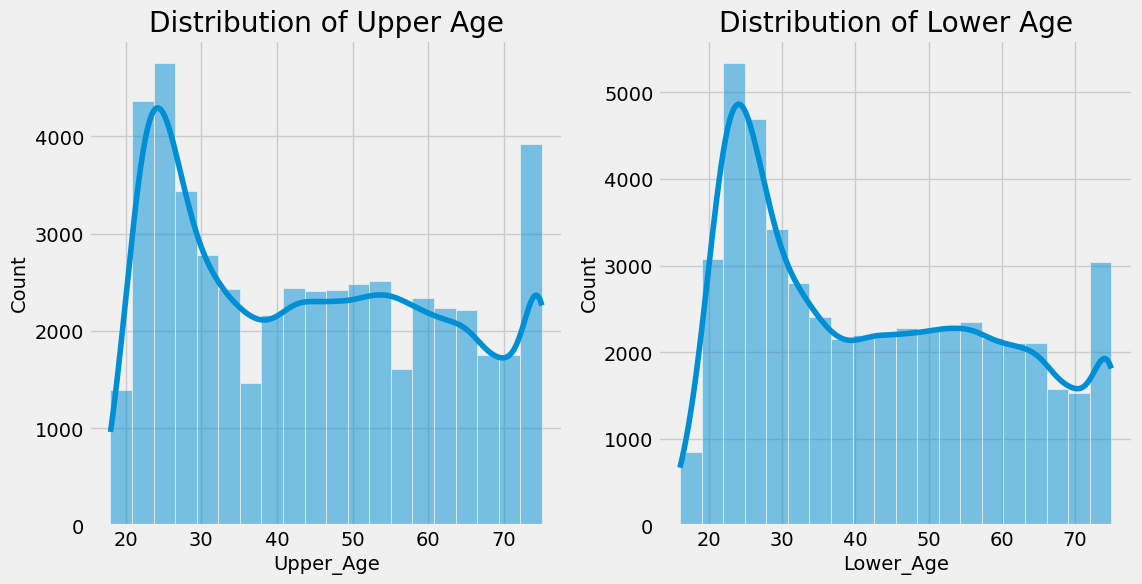

In [208]:
# Plot histograms for Upper_Age and Lower_Age
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Upper_Age'], bins=20, kde=True)
plt.title('Distribution of Upper Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Lower_Age'], bins=20, kde=True)
plt.title('Distribution of Lower Age')

plt.show()

## 3.4 Crosstab

Response              0         1
Is_Spouse_Yes                    
0              0.760787  0.239213
1              0.756352  0.243648
Response                0         1
Upper_Age_Group                    
(20, 30]         0.765593  0.234407
(30, 40]         0.750095  0.249905
(40, 50]         0.756904  0.243096
(50, 60]         0.757833  0.242167
(60, 70]         0.757126  0.242874
(70, 80]         0.767572  0.232428
Response                0         1
Lower_Age_Group                    
(20, 30]         0.763935  0.236065
(30, 40]         0.747925  0.252075
(40, 50]         0.759749  0.240251
(50, 60]         0.764193  0.235807
(60, 70]         0.756002  0.243998
(70, 80]         0.769752  0.230248


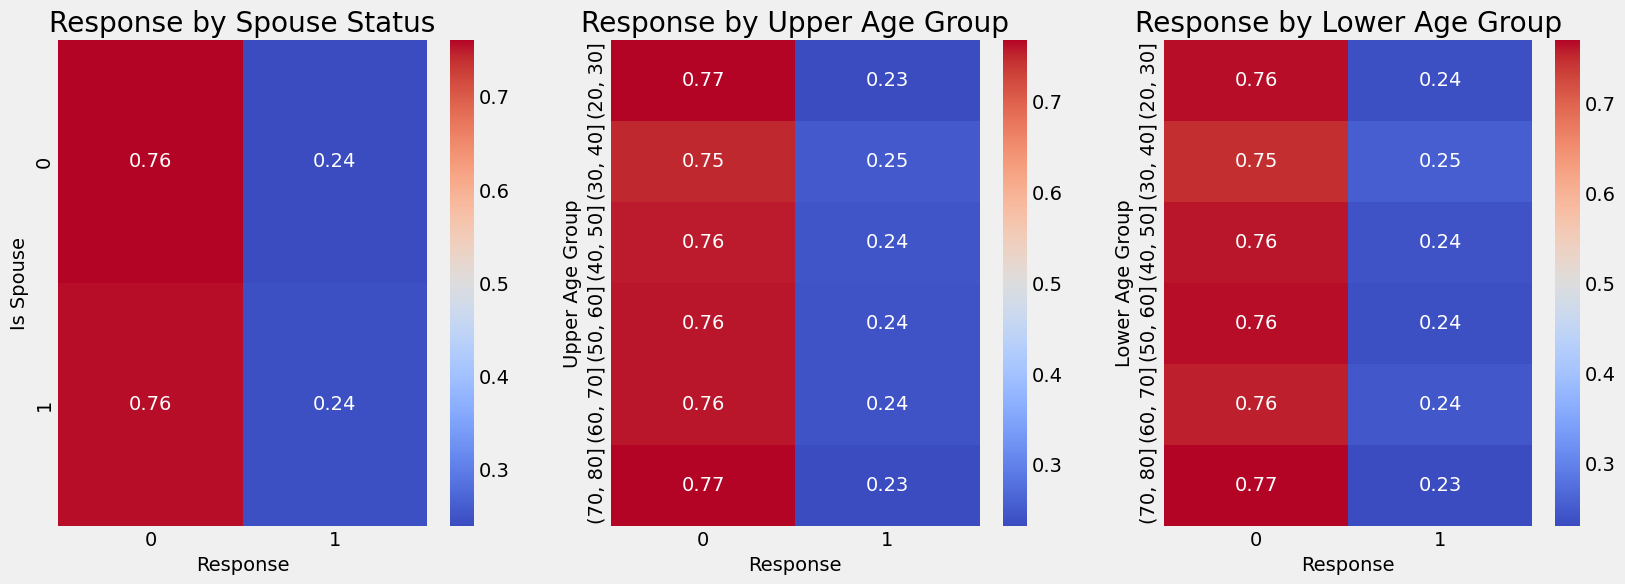

In [209]:
# Crosstab for Is_Spouse_Yes and Response
crosstab_spouse_response = pd.crosstab(df['Is_Spouse_Yes'], df['Response'], normalize='index')
print(crosstab_spouse_response)

# Crosstab for Upper_Age and Response (grouped by age ranges)
df['Upper_Age_Group'] = pd.cut(df['Upper_Age'], bins=[20, 30, 40, 50, 60, 70, 80])
crosstab_upper_age_response = pd.crosstab(df['Upper_Age_Group'], df['Response'], normalize='index')
print(crosstab_upper_age_response)

# Crosstab for Lower_Age and Response (grouped by age ranges)
df['Lower_Age_Group'] = pd.cut(df['Lower_Age'], bins=[20, 30, 40, 50, 60, 70, 80])
crosstab_lower_age_response = pd.crosstab(df['Lower_Age_Group'], df['Response'], normalize='index')
print(crosstab_lower_age_response)

# Visualizing the crosstabs
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(crosstab_spouse_response, annot=True, fmt='.2f', cmap='coolwarm', ax=ax[0])
ax[0].set_title('Response by Spouse Status')
ax[0].set_ylabel('Is Spouse')
ax[0].set_xlabel('Response')

sns.heatmap(crosstab_upper_age_response, annot=True, fmt='.2f', cmap='coolwarm', ax=ax[1])
ax[1].set_title('Response by Upper Age Group')
ax[1].set_ylabel('Upper Age Group')
ax[1].set_xlabel('Response')

sns.heatmap(crosstab_lower_age_response, annot=True, fmt='.2f', cmap='coolwarm', ax=ax[2])
ax[2].set_title('Response by Lower Age Group')
ax[2].set_ylabel('Lower Age Group')
ax[2].set_xlabel('Response')

plt.show()

## 3.5 Heatmap

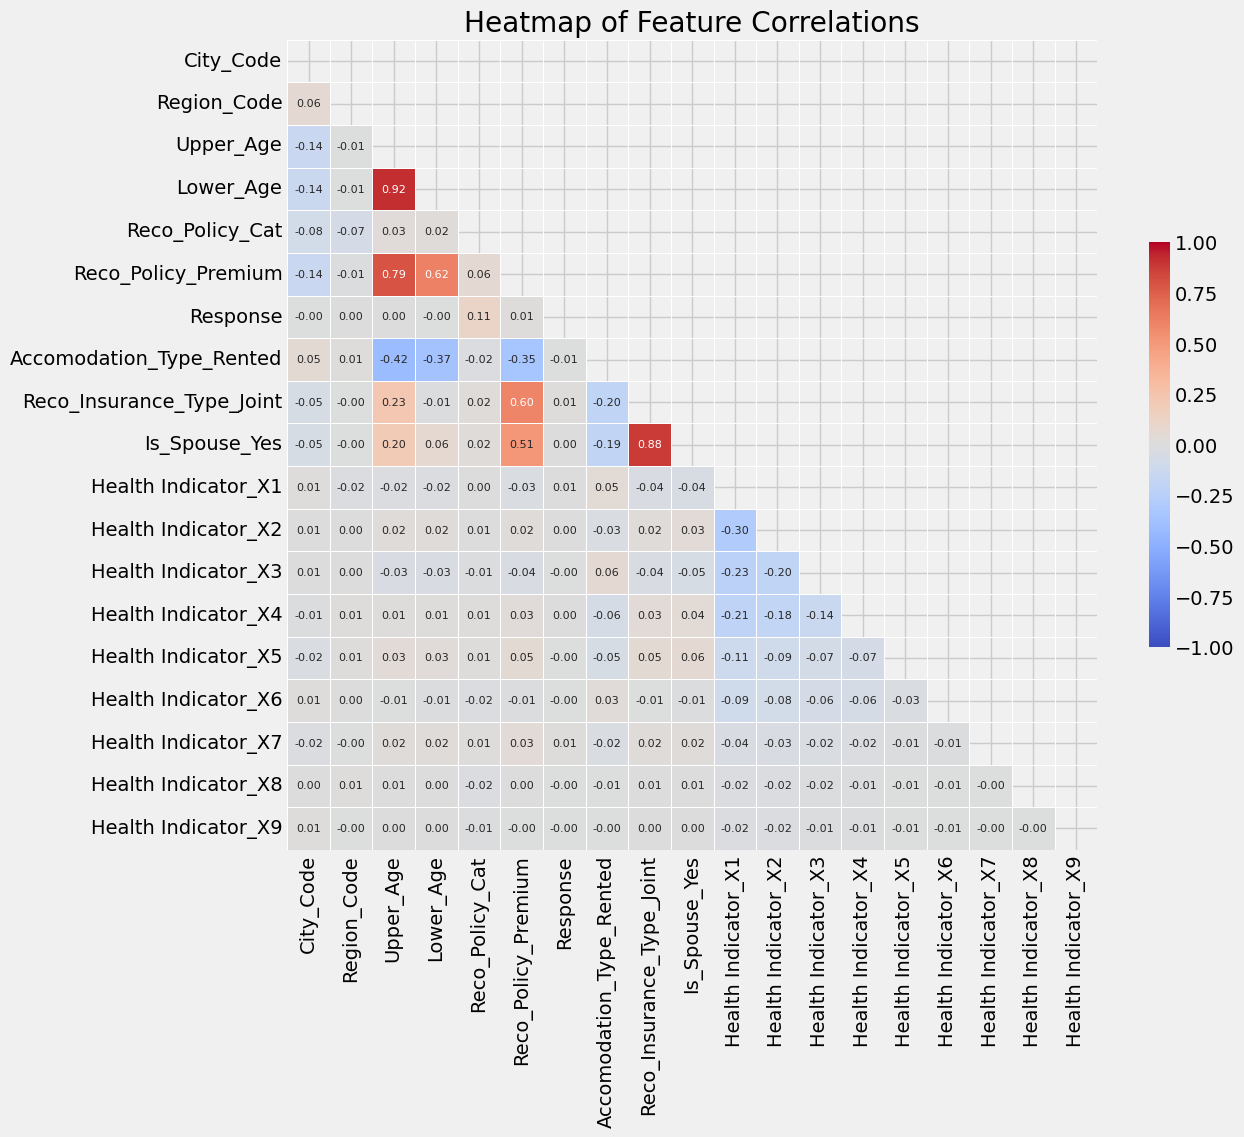

In [210]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure (increasing the size)
plt.figure(figsize=(12, 10))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            vmax=1.0, vmin=-1.0, square=True, linewidths=.5, cbar_kws={"shrink": .5},
            annot_kws={"size": 8})  # smaller annotation font size

plt.title('Heatmap of Feature Correlations')
plt.show()

In [211]:
# Deleting the age group columns to avoid affecting subsequent code
df.drop(columns=['Upper_Age_Group', 'Lower_Age_Group'], inplace=True)

# 4. Models

## 4.1 Random Forest


**Reason for Choice**:
- **Handling Diverse Feature Types**: The dataset includes a mix of numerical and categorical features (e.g., age ranges, policy categories, accommodation types). Random Forest can handle these diverse feature types effectively without requiring extensive preprocessing.
- **Robust to Missing Data**: Some features in the dataset have missing values (e.g., Health Indicator, Holding_Policy_Duration). Random Forest is relatively robust to missing data, making it suitable for this dataset without needing complex imputation strategies.
- **Feature Importance Insight**: The ability to determine feature importance helps in understanding which customer attributes (like age, region, policy type) are most predictive of their response, providing actionable insights for the business.
- 

**Explanation**:
- **Ensemble Learning**: Random Forest builds multiple decision trees on different subsets of the data and averages their predictions, which helps in capturing the diverse patterns present in customer behavior and policy preferences.
- **Bagging**: This technique reduces variance and prevents overfitting, which is important given the potential complexity and noise in customer response data.

In [212]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


### 4.1.1 Split train_data into Training and Testing Sets
First, split train_data subset to create a training set and a testing set. 

In [213]:
# Features and Target
X = df.drop('Response', axis=1)  # Drop the target variable to isolate features
y = df['Response']  # Target variable

# Splitting the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [214]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40705 entries, 34369 to 15795
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   City_Code                  40705 non-null  int32  
 1   Region_Code                40705 non-null  int64  
 2   Upper_Age                  40705 non-null  int64  
 3   Lower_Age                  40705 non-null  int64  
 4   Reco_Policy_Cat            40705 non-null  int64  
 5   Reco_Policy_Premium        40705 non-null  float64
 6   Accomodation_Type_Rented   40705 non-null  uint8  
 7   Reco_Insurance_Type_Joint  40705 non-null  uint8  
 8   Is_Spouse_Yes              40705 non-null  uint8  
 9   Health Indicator_X1        40705 non-null  uint8  
 10  Health Indicator_X2        40705 non-null  uint8  
 11  Health Indicator_X3        40705 non-null  uint8  
 12  Health Indicator_X4        40705 non-null  uint8  
 13  Health Indicator_X5        40705 non-null 

### 4.1.2 Train Random Forest Model
Train a Random Forest classifier using the training data:

Control `max_depth` of random forest:

- **Large value** results in **overfitting**

- **Small value** results in **underfitting**

In [215]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1, min_samples_leaf=4, max_features='sqrt', min_samples_split=10)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_jobs=-1, random_state=42)

### 4.1.3 Evaluate the Model on the Test Set
Evaluate the performance

In [216]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7554289083226884
Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86      7688
           1       0.00      0.00      0.00      2489

    accuracy                           0.76     10177
   macro avg       0.38      0.50      0.43     10177
weighted avg       0.57      0.76      0.65     10177



## 4.2 XGBOOST

XGBoost includes regularization parameters (L1 and L2 regularization), which Random Forest does not have. These regularization terms help in reducing overfitting and improve model generalization.

**Reason for Choice**:
- **Handling Imbalanced Classes**: The target variable (Response) is likely to be imbalanced, with fewer customers showing interest in the insurance offers compared to those who do not. XGBoost's ability to handle imbalanced data through parameters like `scale_pos_weight` helps in effectively training on such datasets.
- **Capturing Complex Relationships**: The dataset includes various interactions between features (e.g., age, health indicators, policy duration). XGBoost’s boosting technique is capable of capturing these complex relationships more effectively than simple models.
- **Speed and Efficiency**: With a relatively large dataset, XGBoost's efficient implementation allows for faster training and prediction, making it practical to iterate and refine the model.

**Explanation**:
- **Gradient Boosting**: XGBoost improves the model iteratively by focusing on the errors made by previous models, which is beneficial for capturing the nuanced patterns in customer responses.
- **Tree Pruning and Regularization**: These features help in avoiding overfitting, which is crucial for generalizing well on unseen customer data.

In [217]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

XGBoost uses its own data structure called DMatrix, which is optimized for both memory efficiency and training speed.

In [218]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [219]:
params = {
    'max_depth': 8,          # Maximum depth of a tree
    'eta': 0.3,              # Step size shrinkage used in update to prevents overfitting
    'silent': 1,             # Logging mode - quiet
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'auc',    # Evaluation metrics for validation data
    'learning_rate': 0.05    # Makes the model more robust by shrinking the weights on each step
}
num_round = 200  # Number of training iterations


In [220]:
bst = xgb.train(params, dtrain, num_round)


In [221]:
# Make predictions
preds = bst.predict(dtest)
predictions = [1 if value > 0.5 else 0 for value in preds]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.7559202122432938
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.99      0.86      7688
           1       0.51      0.04      0.07      2489

    accuracy                           0.76     10177
   macro avg       0.64      0.51      0.46     10177
weighted avg       0.70      0.76      0.67     10177



## 4.3 Neural Network Model

**Reason for Choice**:
- **Modeling Non-Linear Relationships**: The dataset likely contains non-linear relationships between features (e.g., the interaction between age and health indicators). Neural Networks are adept at modeling such non-linear patterns.
- **Scalability with Data Volume**: Given the dataset size, Neural Networks can leverage the volume of data to learn complex patterns, improving prediction accuracy as more data becomes available.
- **Learning Feature Representations**: Neural Networks can automatically learn feature representations, reducing the need for extensive manual feature engineering. This is particularly useful given the diverse and high-dimensional nature of the dataset.

**Explanation**:
- **Deep Learning Capabilities**: Neural Networks, especially deep ones, can capture high-level abstractions in the data, which are useful for predicting customer behavior based on a variety of input features.
- **Backpropagation and Activation Functions**: These mechanisms enable the network to learn from errors and capture non-linear relationships, enhancing the model's ability to predict customer responses accurately.


### 4.3.1 Z-Score Normalization

Z-score normalization, also known as standardization, is a data normalization technique that transforms features to have zero mean and a standard deviation of one. This method is particularly useful for datasets where the features have different scales.

#### Key Points of Z-Score Normalization:

- **Centering the Mean**: 
  - Each feature's mean is subtracted from the data, leading to a new mean of zero.
  
- **Scaling to Unit Variance**: 
  - Each feature is divided by its standard deviation, resulting in a standard deviation of one.
  
- **Formula**: 
  - The formula for Z-score normalization of a feature `X` is given by:
    \[
    Z = \frac{(X - \mu)}{\sigma}
    \]
  - Where `X` is the original value of the feature, `\mu` is the mean of the feature, and `\sigma` is the standard deviation of the feature.

#### Benefits of Z-Score Normalization:

- **Improves Algorithm Efficiency**:
  - Many machine learning algorithms, especially those that use distance measures (like k-nearest neighbors) or gradients (like in neural networks), converge faster if all features are on the same scale.

- **Handles Outliers**:
  - Standardization is less sensitive to outliers than Min-Max scaling, which can distort the representation of data significantly if outliers are present.

- **Application in Machine Learning**:
  - Useful in PCA, linear regression, logistic regression, and neural networks where it enhances the stability and performance of the learning algorithm.

#### Considerations:

- **Not Bound to a Specific Range**:
  - Unlike Min-Max scaling which bounds features to a specific range (e.g., [0, 1]), standardization does not bind values to a fixed range. This might be a drawback in scenarios where the input data is required to be strictly positive or within a specific interval.

#### Implementation in Python (using `Pytorch`):


In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset, DataLoader

# Assuming 'df' is your DataFrame and 'Response' is the target variable
X = df.drop('Response', axis=1).values
y = df['Response'].values

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

# Create data loaders
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)



### 4.3.2 Define the Neural Network Model

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset, and supports automatic batching, sampling, shuffling and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [223]:
import torch.nn as nn
import torch.nn.functional as F

class BinaryClassifier(nn.Module):
    def __init__(self):
        super(BinaryClassifier, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 32)
        self.fc2 = nn.Linear(32, 16)
        self.output = nn.Linear(16, 1)
    
    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(self.fc2(x))
        print(x.shape)
        x = torch.sigmoid(self.output(x))
        return x


# loss = output(fc2(fc1(x))) = fc3 * fc2 * fc1 * x

# loss/x = loss/fc3 * fc3/fc2 * fc2/fc1 * fc1/x 

model = BinaryClassifier()
print(model)


BinaryClassifier(
  (fc1): Linear(in_features=18, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=16, bias=True)
  (output): Linear(in_features=16, out_features=1, bias=True)
)


### 4.3.3 Train the Model
To train a model, we need a loss function and an optimizer.

In [224]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10

# In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.
for epoch in range(num_epochs):
    loss_list = []
    for data, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets.view(-1, 1))
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
    print(f'Epoch {epoch + 1}, Loss: {sum(loss_list) / len(loss_list)}')


torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([3

In [225]:
outputs

tensor([[0.3167]], grad_fn=<SigmoidBackward0>)

### 4.3.4 Evaluate the Model
Evaluate the model on the test set.

In [226]:
def eval_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in test_loader:
            outputs = model(data)
            predicted = (outputs.data > 0.5).float()
            total += targets.size(0)
            correct += (predicted.view(-1) == targets).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

eval_model(model, test_loader)

torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([32, 16])
torch.Size([3

## 4.4 Summary of Modeling

After reviewing the results of the three models, it's clear that the accuracy mainly depend on the dataset instead of which model to choose.

# 5 Project Summary

## Objective

This project leveraged machine learning techniques to enhance how a financial services company predicts customer responses to health insurance offers. By applying models like Random Forest, XGBoost, and neural networks, the aim was to refine marketing strategies and boost customer engagement.

## Achievements

- **Enhanced Model Accuracy**: Key improvements in model accuracy were achieved, significantly benefiting targeted marketing initiatives.
- **Data Handling**: Thorough data preprocessing, including effective normalization and encoding, prepared the dataset for optimal model training.
- **Technical Advancements**: The use of advanced machine learning frameworks such as TensorFlow and PyTorch allowed for robust model training. GPU acceleration made it feasible to experiment with more complex models by reducing training times.

## Business Impact

The project's success in improving prediction accuracy promises to increase marketing efficiency, reduce costs, and enhance conversion rates by more precisely targeting customers likely to be interested in new offers.

## Next Steps

- **Model Exploration**: Further exploration into more complex neural network architectures could lead to even better predictive models.
- **Operational Integration**: Integrating these models into the company’s operational processes could help in dynamically interacting with customers in real-time.
- **Continuous Improvement**: Implementing continuous real-time data analysis could provide ongoing refinements to the models, keeping them adaptive to changing customer behaviors.

## Conclusion

The project has established a robust foundation for integrating advanced machine learning techniques into business strategies, demonstrating substantial benefits in customer service and business decision-making.
